In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from tqdm import tqdm
from gamma_transients import smallest_enc_circ


In [3]:
mec_radii = []
N = int(1e4)
for Nmax in tqdm(range(3,21)):
    # for i in tqdm(range(1000)):
    rvs = stats.multivariate_normal.rvs([0,0],cov=[[.1**2,0],[0,.1**2]],size=(N,Nmax))
    mec = np.array([smallest_enc_circ.make_circle(points) for points in rvs])
    mec_radii.append(mec[:,-1])

100%|██████████| 18/18 [00:19<00:00,  1.08s/it]


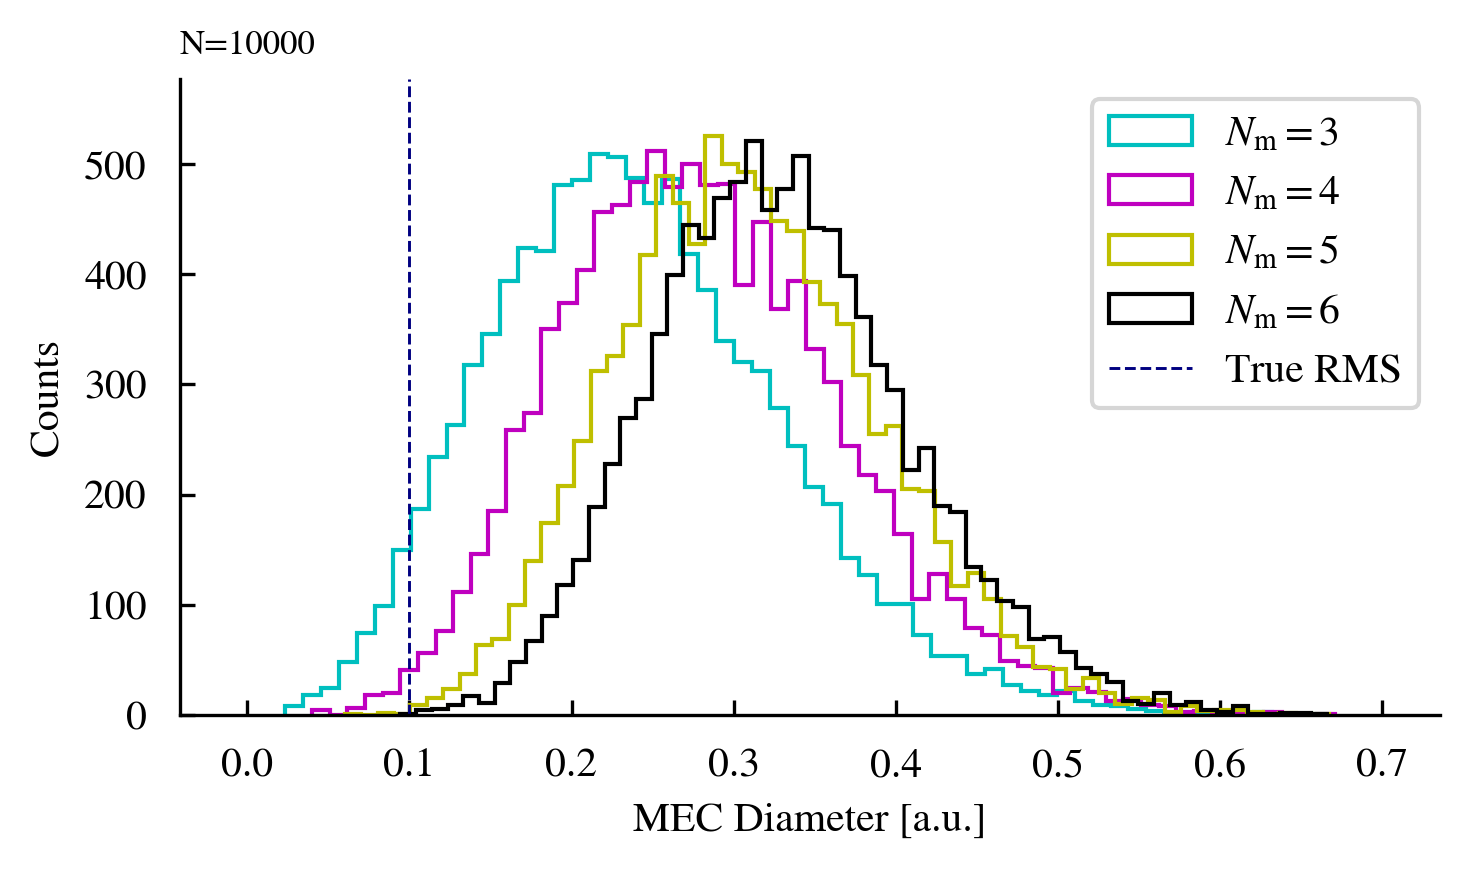

In [7]:
plt.figure(figsize=(5,3))
colors = ["c","m","y","k"]
for c,mec,nmax in zip(colors,mec_radii,[3,4,5,6]):
    plt.hist(mec*2,histtype="step",bins="fd",color=c,label=fr"$N_{{\mathrm{{m}}}} = {nmax}$")
ylim = plt.ylim()
plt.vlines(0.1,*ylim,color="navy",ls="--",label="True RMS")
plt.ylim(*ylim)
plt.legend()
plt.title(f"N={N}",loc="left",fontsize="small")
plt.xlabel("MEC Diameter [a.u.]")
plt.ylabel("Counts")
plt.savefig("figures/tests/sec_radius_bias.png",facecolor="white")
plt.savefig("figures/mec_radius_bias.pdf")
# plt.close()

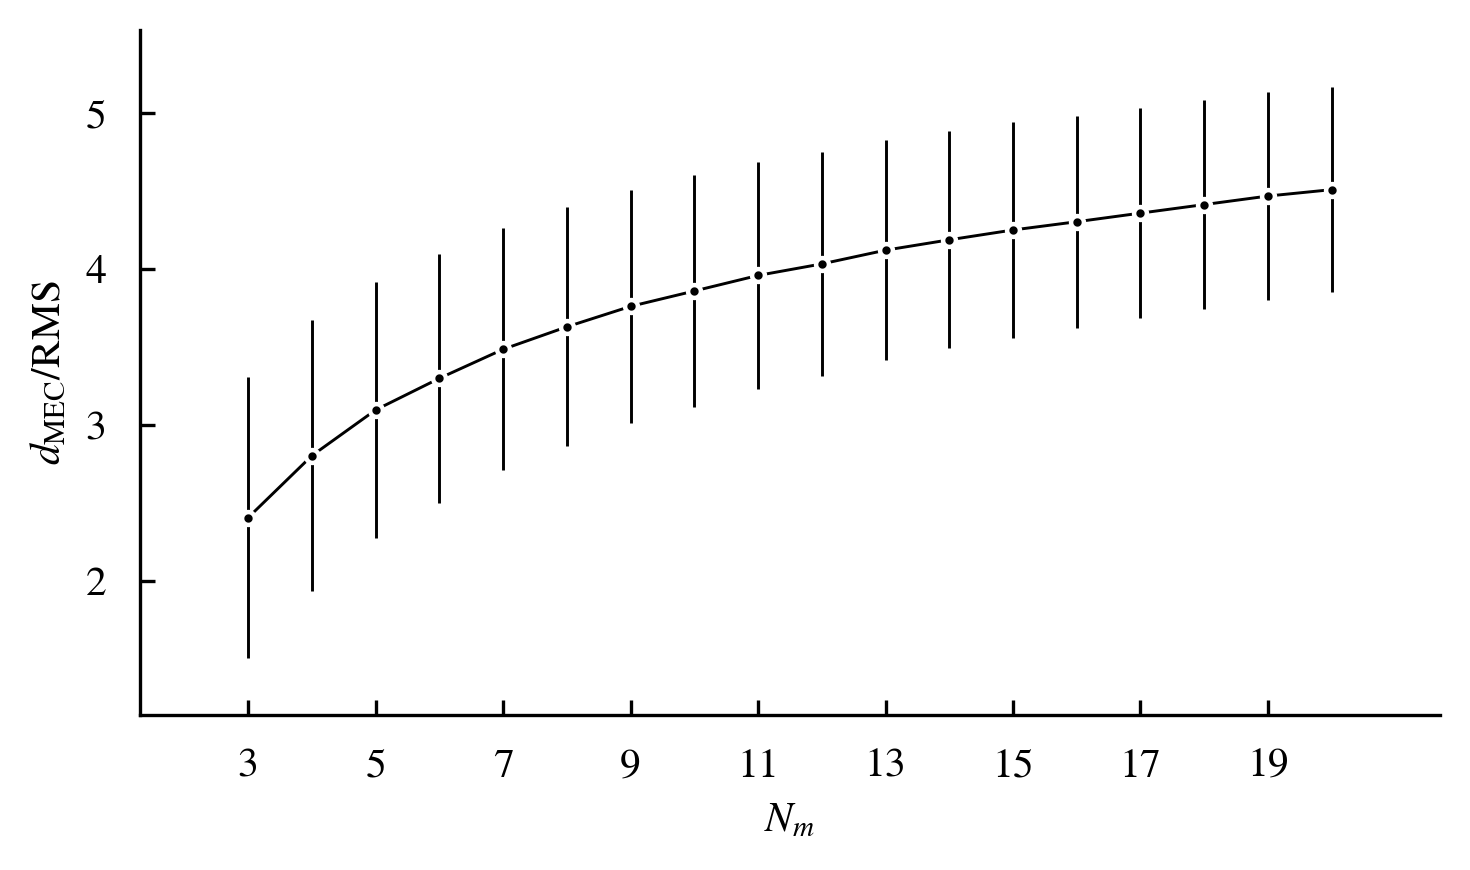

In [67]:
plt.figure(figsize=(5,3))
x = np.arange(3,21)
y = [np.mean(2*mec)/0.1 for mec in mec_radii]
yerr = [np.std(2*mec)/0.1 for mec in mec_radii]

plt.errorbar(x,y,yerr=yerr,fmt='none',zorder=2)
plt.plot(x,y,zorder=2)
plt.scatter(x,y,color="white",zorder=2,s=10)
plt.scatter(x,y,s=1,zorder=2,color="black")

plt.xticks(range(3,21,2))
plt.xlabel(r"$N_{m}$")
plt.ylabel(r"$d_{\mathrm{MEC}} / \mathrm{RMS}$")
# plt.title("Bias of MEC radius to multiplet RMS", loc="left")
# plt.savefig("figures/tests/rmec_over_rms_evolution.pdf")
plt.savefig("figures/dmec_over_rms_evolution.png",facecolor="white",dpi=300)
plt.show()
# plt.close()

illustrative plot of mec vs rms

In [17]:
from matplotlib import figure,axes,patches
import numpy as np
from scipy import stats
from gamma_transients import smallest_enc_circ


In [4]:
Nm = 21
photons = stats.multivariate_normal.rvs([0,0],cov=[[.1**2,0],[0,.1**2]],size=(Nm,))
mec = smallest_enc_circ.make_circle(photons)

In [7]:
photons.shape

(21, 2)

In [48]:
fig = figure.Figure(figsize=(2.8,2.8))
ax = fig.add_subplot()
ax.scatter(*photons.transpose(),marker="x")

ax.scatter(0,0,color="red",s=3)
mec_patch = patches.Circle(mec[:2],mec[2],fill=False,color="darkgrey")
rms_patch = patches.Circle((0,0),1.51*.1,fill=False,color="dimgrey")
ax.add_patch(mec_patch)
ax.add_patch(rms_patch)

ax.set_xlim(-0.45,0.45)
ax.set_ylim(-0.45,0.45)
ticks = [-0.4,-0.2,0,0.2,0.4]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_aspect("equal")

ax.text(-0.18,0.3,"MEC",color="grey",fontsize="large")
ax.text(.12,-0.03,r"$\mathrm{Supp}(68\%~\mathrm{pdf})$",color="black",fontsize="large")


fig.savefig("figures/mec_bias_illustration.png",facecolor="white")

In [47]:
np.sqrt(-2*np.log((1-0.68)))

1.5095921854516634

In [44]:
import numpy as np
from scipy.stats import poisson,expon, uniform
from tqdm import tqdm

T = 10
mu = 1

A = uniform.rvs(0,T,size=(10000,10000))

L1 = [expon.fit(np.diff(np.sort(a)))[1]**-1 for a in tqdm(A)]

100%|██████████| 10000/10000 [00:06<00:00, 1568.39it/s]


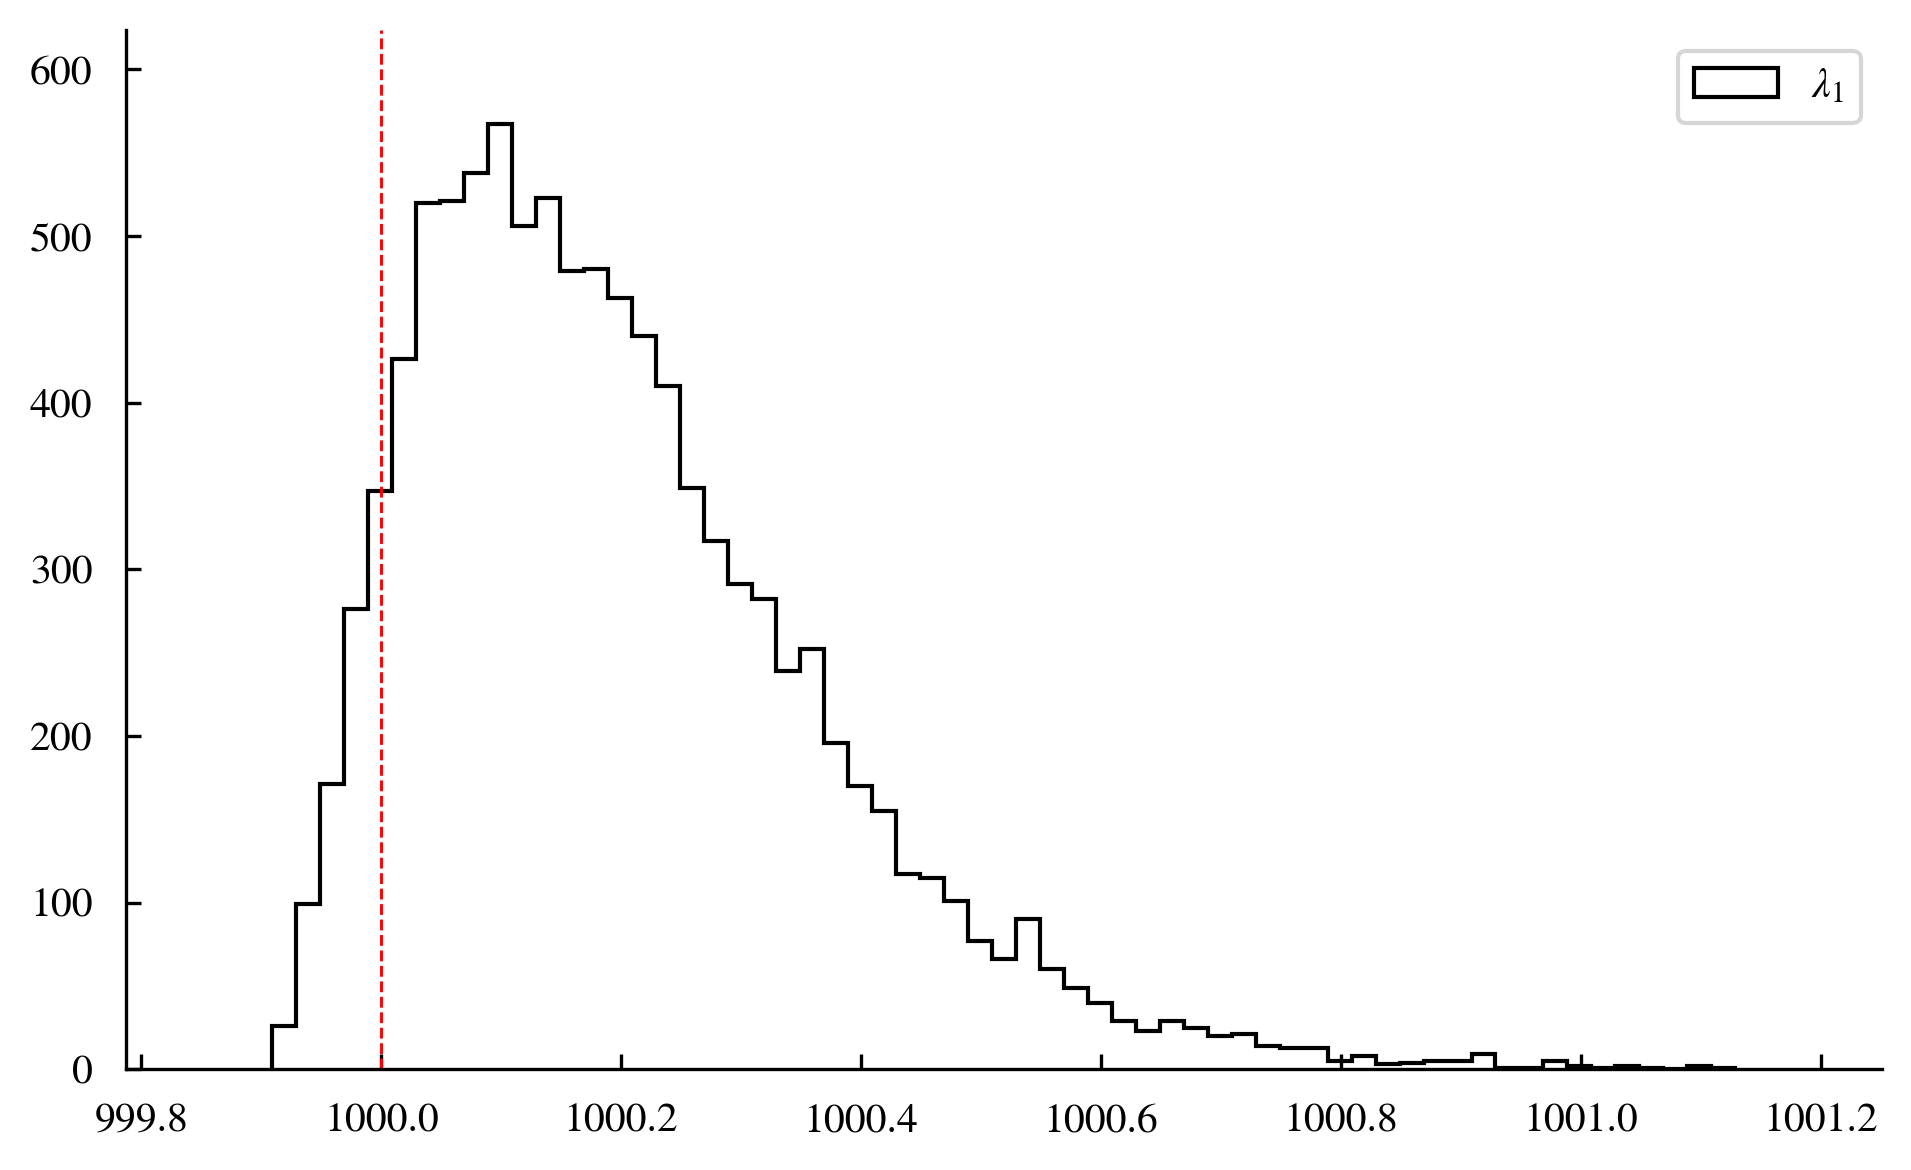

In [45]:
import matplotlib.pyplot as plt
h1 = plt.hist(L1,bins="fd",histtype="step",label=r"$\lambda_1$")
ylim = plt.ylim()
plt.vlines(1000,*ylim,color="red",ls="--")
plt.ylim(*ylim)
plt.legend()